<a href="https://colab.research.google.com/github/Anoif01/Disruption_forecasting_in_Supply_Chain/blob/main/Viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subject: Visualisation of dynamic heterogeneous graph datasets and predictions.

### Author: Xiaohua LU

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Personal_Project/SupplyGraph/Supply_Graph_Git')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install -q wandb
import wandb
from google.colab import userdata
WANDB_TOKEN = userdata.get('WANDB_KEY')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from IPython.display import display
from matplotlib import pyplot as plt
from matplotlib.patches import FancyBboxPatch
from matplotlib.animation import FuncAnimation

## Load Data

### node index; edge index

In [ ]:
node_index_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Nodes/NodesIndex.csv'
node_type_group_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Nodes/Node Types (Product Group and Subgroup).csv'
node_type_plantstock_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Nodes/Nodes Type (Plant & Storage).csv'

edge_index_plant_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Plant).csv'
edge_index_group_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Product Group).csv'
edge_index_subgroup_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Product Sub-Group).csv'
edge_index_stock_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Edges/EdgesIndex/Edges (Storage Location).csv'

df_node_index = pd.read_csv(node_index_path, header=0)
df_node_type_group = pd.read_csv(node_type_group_path, header=0)
df_node_type_plantstock = pd.read_csv(node_type_plantstock_path, header=0)

df_edge_index_plant = pd.read_csv(edge_index_plant_path, header=0)
df_edge_index_group = pd.read_csv(edge_index_group_path, header=0)
df_edge_index_subgroup = pd.read_csv(edge_index_subgroup_path, header=0)
df_edge_index_stock = pd.read_csv(edge_index_stock_path, header=0)

In [ ]:
display(df_node_type_group.head(5))
print(df_node_type_group.shape)

display(df_node_type_plantstock.head(5))
print(df_node_type_plantstock.shape)

,Node,Group,Sub-Group
0,SOS008L02P,S,SOS
1,SOS005L04P,S,SOS
2,SOS003L04P,S,SOS
3,SOS002L09P,S,SOS
4,SOS001L12P,S,SOS


(41, 3)


,Node,Plant,Storage Location
0,POV002L09P,2120,2030.0
1,SOS001L12P,2120,2030.0
2,POP002L09P,2120,2030.0
3,POP001L12P,2120,2030.0
4,POP001L12P,2120,2030.0


(6545, 3)


In [ ]:
display(df_edge_index_plant.head(5))
print(df_edge_index_plant.shape)

display(df_edge_index_group.head(5))
print(df_edge_index_group.shape)

display(df_edge_index_subgroup.head(5))
print(df_edge_index_subgroup.shape)

display(df_edge_index_stock.head(5))
print(df_edge_index_stock.shape)

,Plant,node1,node2
0,1901,28,24
1,1903,22,24
2,1903,22,26
3,1903,22,31
4,1903,22,29


(1647, 3)


,node1,node2,GroupCode
0,0,1,S
1,0,2,S
2,0,3,S
3,0,4,S
4,0,5,S


(188, 3)


,node1,node2,SubGroupCode
0,0,1,SOS
1,0,2,SOS
2,0,3,SOS
3,0,4,SOS
4,0,5,SOS


(52, 3)


,Storage Location,node1,node2
0,130.0,28,24
1,330.0,1,3
2,330.0,1,2
3,330.0,1,5
4,330.0,1,4


(3046, 3)


### unit

In [ ]:
unit_delivery_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Unit/Delivery To distributor.csv'
unit_factory_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Unit/Factory Issue.csv'
unit_production_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Unit/Production .csv'
unit_sales_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Unit/Sales Order.csv'

df_unit_delivery = pd.read_csv(unit_delivery_path, header=0)
df_unit_factory = pd.read_csv(unit_factory_path, header=0)
df_unit_production = pd.read_csv(unit_production_path, header=0)
df_unit_sales = pd.read_csv(unit_sales_path, header=0)

In [ ]:
display(df_unit_delivery.head(3))
print(df_unit_delivery.shape)

display(df_unit_factory.head(3))
print(df_unit_factory.shape)

display(df_unit_production.head(3))
print(df_unit_production.shape)

display(df_unit_sales.head(3))
print(df_unit_sales.shape)

,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,455.0,2241.00,342.0,1698.000000,3816.000000,1555.0,69.0,23.000000,72.0,...,0,160.0,0.000000,0,0,0,0,0,0,0.0
1,2023-01-02 00:00:00,327.0,8286.00,1458.0,9240.000000,12683.000000,5324.0,66.0,60.000000,85.0,...,0,980.0,55.228958,0,0,0,0,0,0,0.0
2,2023-01-03 00:00:00,523.5,11279.75,1207.0,10290.445048,14731.166033,5393.5,24.0,42.832065,270.0,...,18,854.5,203.000000,0,0,0,0,0,0,0.0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,220.0,2598.0,287.0,2080.0,2748.0,1670.634,0.0,10.0,100.0,...,43,1341.0,200,0,0,0,0,0,0,0
1,2023-01-02 00:00:00,485.0,4982.0,1048.0,4640.0,7560.0,3676.000,0.0,60.0,88.0,...,0,427.0,46,0,0,0,0,0,0,0
2,2023-01-03 00:00:00,520.0,11175.0,719.0,10801.0,12661.0,6334.500,0.0,0.0,195.0,...,5,435.0,0,0,0,0,0,0,0,0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,1008,3008,0,2034,4016,1003,0,0,0,...,48,1000,0,0,0,0,0,0,0,0
1,2023-01-02 00:00:00,1014,6000,0,6000,7000,3500,0,0,154,...,0,300,0,0,0,0,0,25,0,0
2,2023-01-03 00:00:00,0,4012,0,5053,10000,8500,0,0,0,...,0,300,0,0,0,0,0,0,0,0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,1355.0,12594.0,1949.0,14556.000000,21394.0,8552.0,1159.0,100.0,348.0,...,25,1507.0,225.0,0,0,0,0,0,0,0
1,2023-01-02 00:00:00,338.0,11677.0,1842.0,13085.000000,17059.0,7207.0,502.0,160.0,160.0,...,0,602.0,109.0,0,0,0,0,0,0,0
2,2023-01-03 00:00:00,226.0,8551.0,1135.0,8573.107971,12178.0,4234.0,290.0,278.0,190.0,...,0,1363.0,100.0,0,0,0,0,12,0,0


(221, 42)


### weight

In [ ]:
weight_delivery_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Weight/Delivery to Distributor.csv'
weight_factory_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Weight/Factory Issue.csv'
weight_production_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Weight/Production .csv'
weight_sales_path = './SupplyGraph-main/Raw Dataset/Homogenoeus/Temporal Data/Weight/Sales Order .csv'

df_weight_delivery = pd.read_csv(weight_delivery_path, header=0)
df_weight_factory = pd.read_csv(weight_factory_path, header=0)
df_weight_production = pd.read_csv(weight_production_path, header=0)
df_weight_sales = pd.read_csv(weight_sales_path, header=0)

In [ ]:
display(df_weight_delivery.head(3))
print(df_weight_delivery.shape)

display(df_weight_factory.head(3))
print(df_weight_factory.shape)

display(df_weight_production.head(3))
print(df_weight_production.shape)

display(df_weight_sales.head(3))
print(df_weight_sales.shape)

,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,6.69760,41.2344,3.77568,28.11888,42.128640,17.16720,0.76176,0.253920,1.3104,...,0.00,0.960,0.000000,0,0,0,0.0,0.0,0,0.0
1,2023-01-02 00:00:00,4.81344,152.4624,16.09632,153.01440,140.020320,58.77696,0.72864,0.662400,1.5470,...,0.00,5.880,0.265099,0,0,0,0.0,0.0,0,0.0
2,2023-01-03 00:00:00,7.70592,207.5474,13.32528,170.40977,162.632073,59.54424,0.26496,0.472866,4.9140,...,0.45,5.127,0.974400,0,0,0,0.0,0.0,0,0.0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,3.2384,47.8032,3.16848,34.44480,30.33792,18.443799,0.0,0.1104,0,...,1.075,8.046,0.9600,0,0,0,0.0,0.0,0,0
1,2023-01-02 00:00:00,7.1392,91.6688,11.56992,76.83840,83.46240,40.583040,0.0,0.6624,0,...,0.000,2.562,0.2208,0,0,0,0.0,0.0,0,0
2,2023-01-03 00:00:00,7.6544,205.6200,7.93776,178.86456,139.77744,69.932880,0.0,0.0000,0,...,0.125,2.610,0.0000,0,0,0,0.0,0.0,0,0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,14.83776,55.3472,0.0,33.68304,44.33664,11.07312,0.0,0.0,0.0000,...,1.2,6.0,0.0,0,0,0,0.0,0.0,0,0
1,2023-01-02 00:00:00,14.92608,110.4000,0.0,99.36000,77.28000,38.64000,0.0,0.0,2.8028,...,0.0,1.8,0.0,0,0,0,0.0,0.6,0,0
2,2023-01-03 00:00:00,0.00000,73.8208,0.0,83.67768,110.40000,93.84000,0.0,0.0,0.0000,...,0.0,1.8,0.0,0,0,0,0.0,0.0,0,0


(221, 42)


,Date,SOS008L02P,SOS005L04P,SOS003L04P,SOS002L09P,SOS001L12P,SOS500M24P,SOS250M48P,SOP001L12P,POV005L04P,...,MAHS025K,SE500G24P,SE200G24P,ATPPCH5X5K,ATPA1K24P,MAPA1K24P,MAP1K25P,MAC1K25P,EEA500G12P,EEA200G24P
0,2023-01-01 00:00:00,19.94560,231.7296,21.51696,241.047360,236.18976,94.41408,12.79536,1.10400,6.3336,...,0.625,9.042,1.0800,0.0,0.0,0.0,0.0,0.000,0.0,0.0
1,2023-01-02 00:00:00,4.97536,214.8568,20.33568,216.687600,188.33136,79.56528,5.54208,1.76640,2.9120,...,0.000,3.612,0.5232,0.0,0.0,0.0,0.0,0.000,0.0,0.0
2,2023-01-03 00:00:00,3.32672,157.3384,12.53040,141.970668,134.44512,46.74336,3.20160,3.06912,3.4580,...,0.000,8.178,0.4800,0.0,0.0,0.0,0.0,0.288,0.0,0.0


(221, 42)


## Viz Dataset

In [ ]:
# Drop duplications of all edges
df_edge_index_group = df_edge_index_group.drop_duplicates()
df_edge_index_subgroup = df_edge_index_subgroup.drop_duplicates()
df_edge_index_plant = df_edge_index_plant.drop_duplicates()
df_edge_index_stock = df_edge_index_stock.drop_duplicates()

print(df_edge_index_group.shape)
print(df_edge_index_subgroup.shape)
print(df_edge_index_plant.shape)
print(df_edge_index_stock.shape)

(182, 3)
(51, 3)
(1647, 3)
(3046, 3)


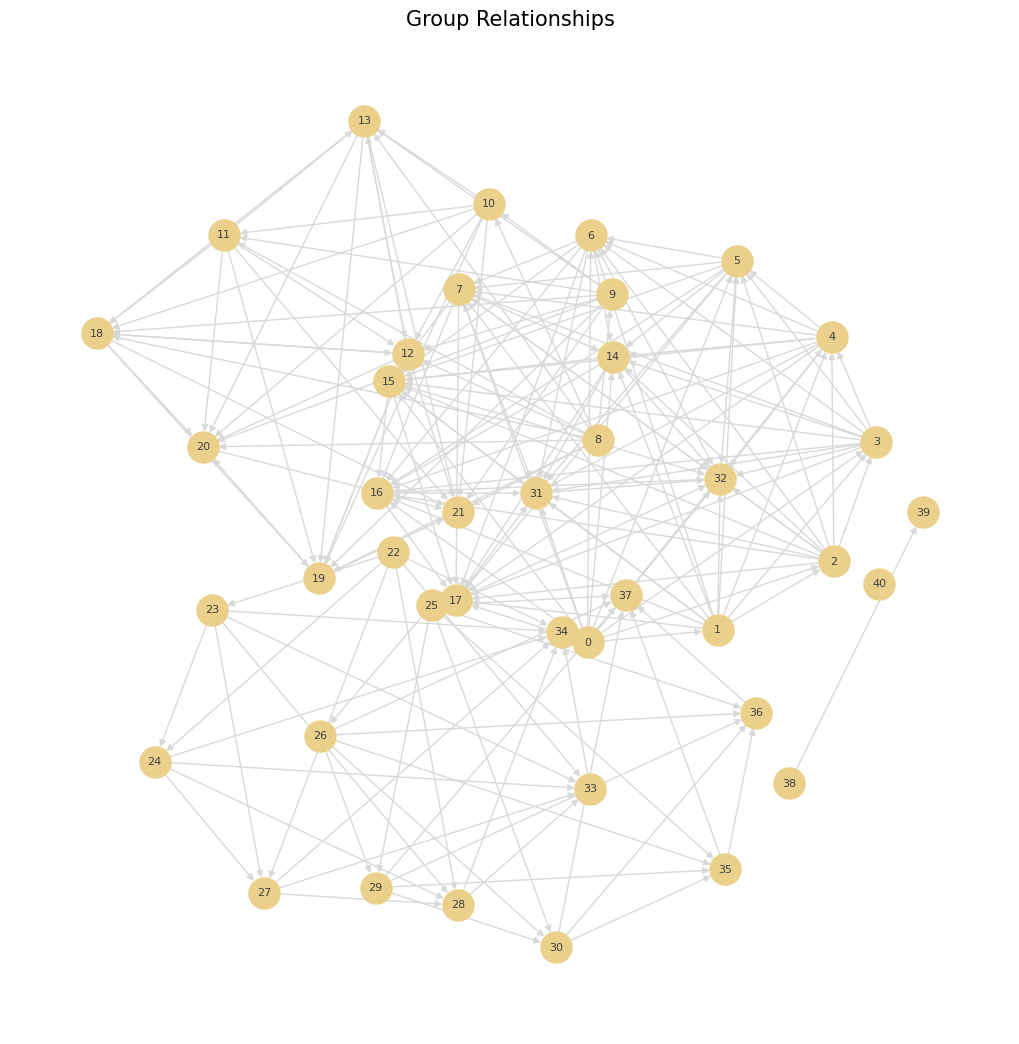

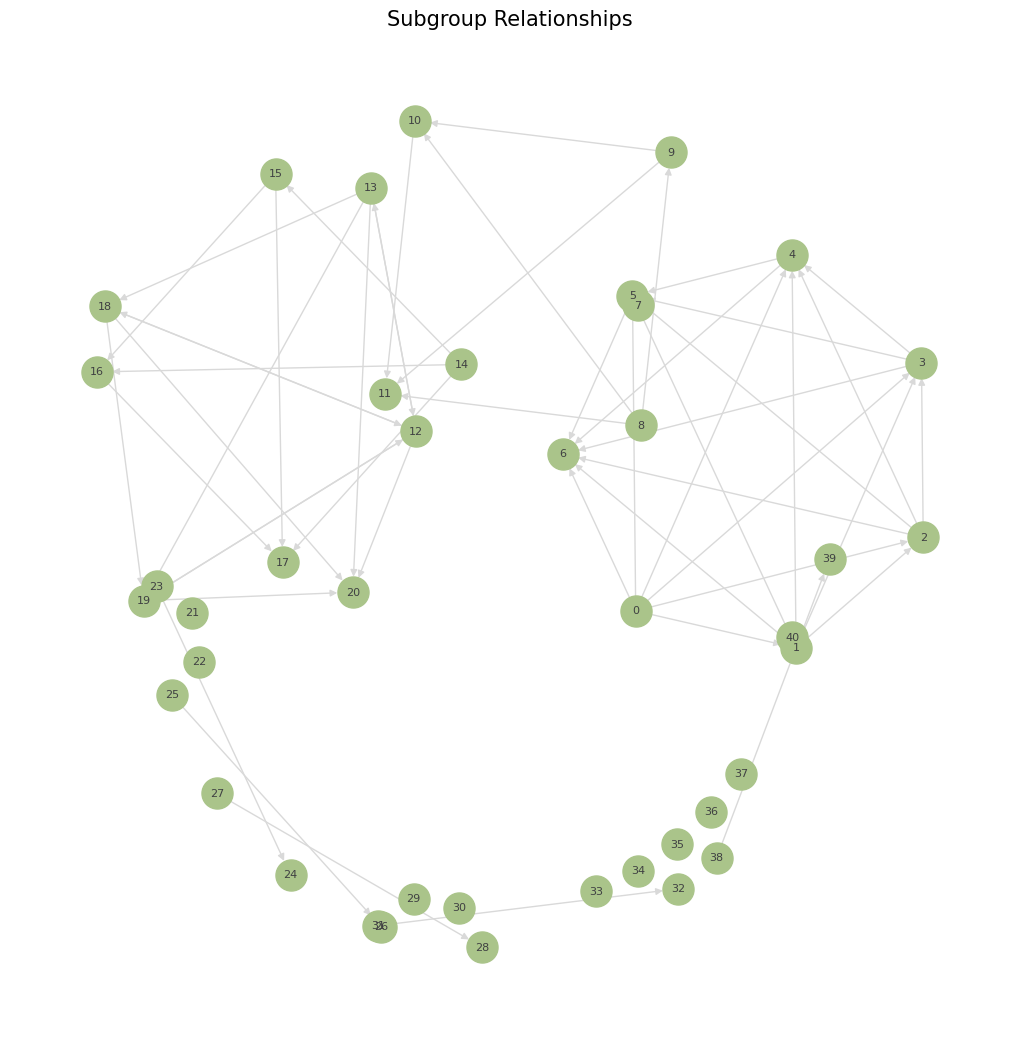

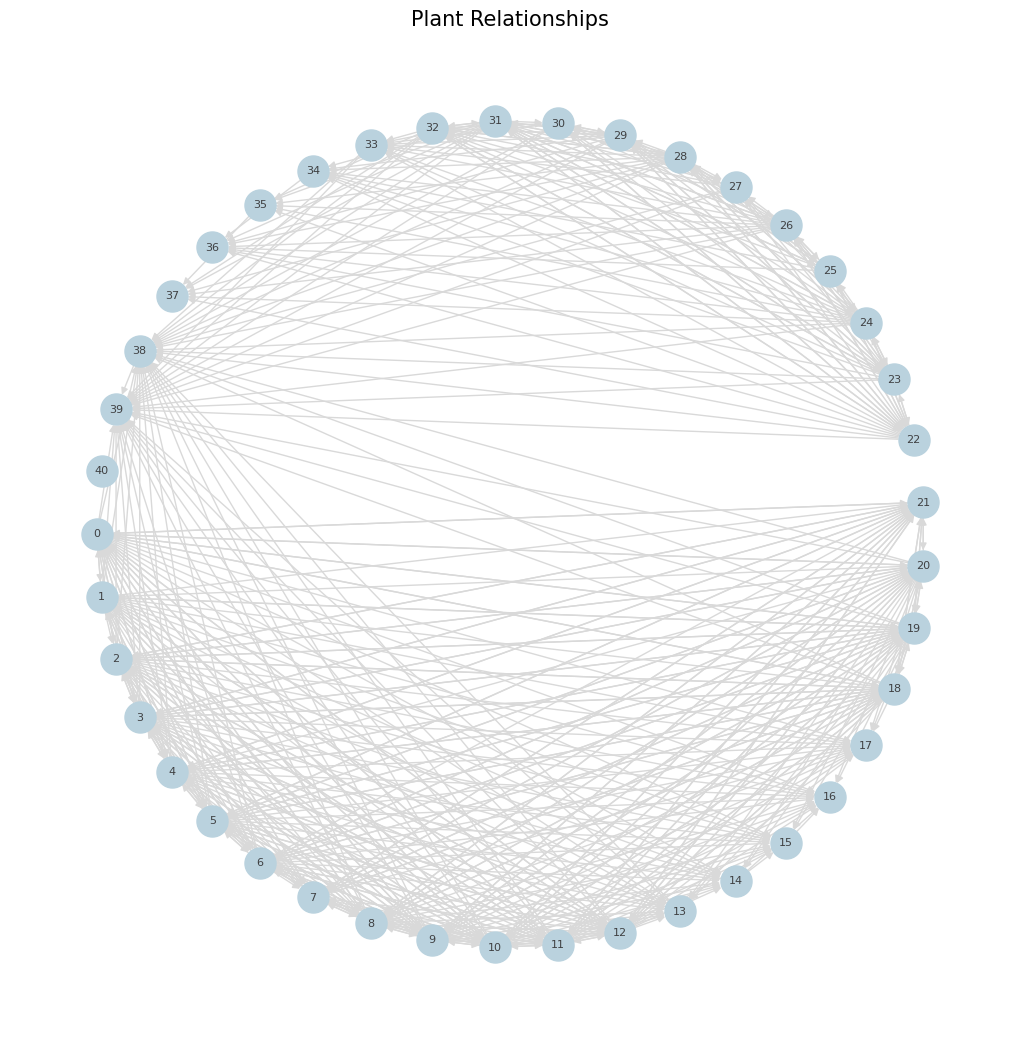

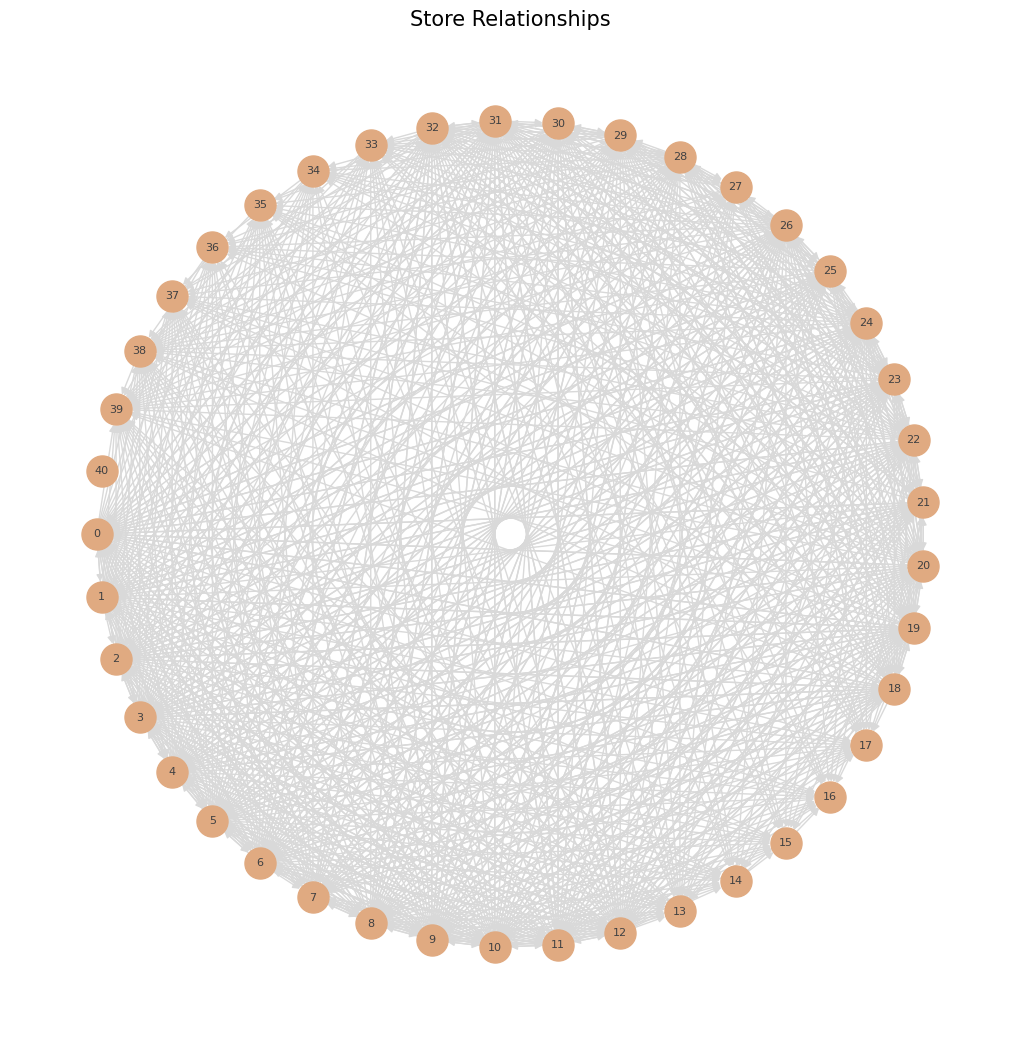

In [ ]:
# Create an empty graph by nx
G = nx.DiGraph()

# Add nodes in graph
nodes = range(df_unit_sales.shape[1]-1)
G.add_nodes_from(nodes)


# Extracting edges from dataframes
edges_group = list(zip(df_edge_index_group['node1'], df_edge_index_group['node2']))
edges_subgroup = list(zip(df_edge_index_subgroup['node1'], df_edge_index_subgroup['node2']))
edges_plant = list(zip(df_edge_index_plant['node1'], df_edge_index_plant['node2']))
edges_store = list(zip(df_edge_index_stock['node1'], df_edge_index_stock['node2']))

# Visualise for each relationship
def plot_graph(edges, title, edge_color, node_color, layout='spring'):
    plt.figure(figsize=(10, 10))
    H = G.copy()
    H.add_edges_from(edges, color=edge_color)

    # Test different type of viz
    if layout == 'spring':
        pos = nx.spring_layout(H, k=0.2, iterations=20)  # 调整 k 和 iterations 参数
    elif layout == 'circular':
        pos = nx.circular_layout(H)
    elif layout == 'shell':
        pos = nx.shell_layout(H)
    elif layout == 'kamada_kawai':
        pos = nx.kamada_kawai_layout(H)

    nx.draw(H, pos, edge_color=edge_color, with_labels=False, node_size=500, node_color=node_color)
    nx.draw_networkx_labels(H, pos, font_size=8, font_color="#3F4042", font_family="sans-serif")

    plt.title(title, fontsize=15)
    plt.show()

# ploting
ly = 'kamada_kawai'
edge_color='#D9D9D9'
plot_graph(edges_group, 'Group Relationships', edge_color,"#EBD08B", layout=ly)
plot_graph(edges_subgroup, 'Subgroup Relationships', edge_color,"#AAC48A", layout=ly)
plot_graph(edges_plant, 'Plant Relationships', edge_color,"#BAD2DE", layout="shell")
plot_graph(edges_store, 'Store Relationships', edge_color,"#E0AA81", layout="shell")

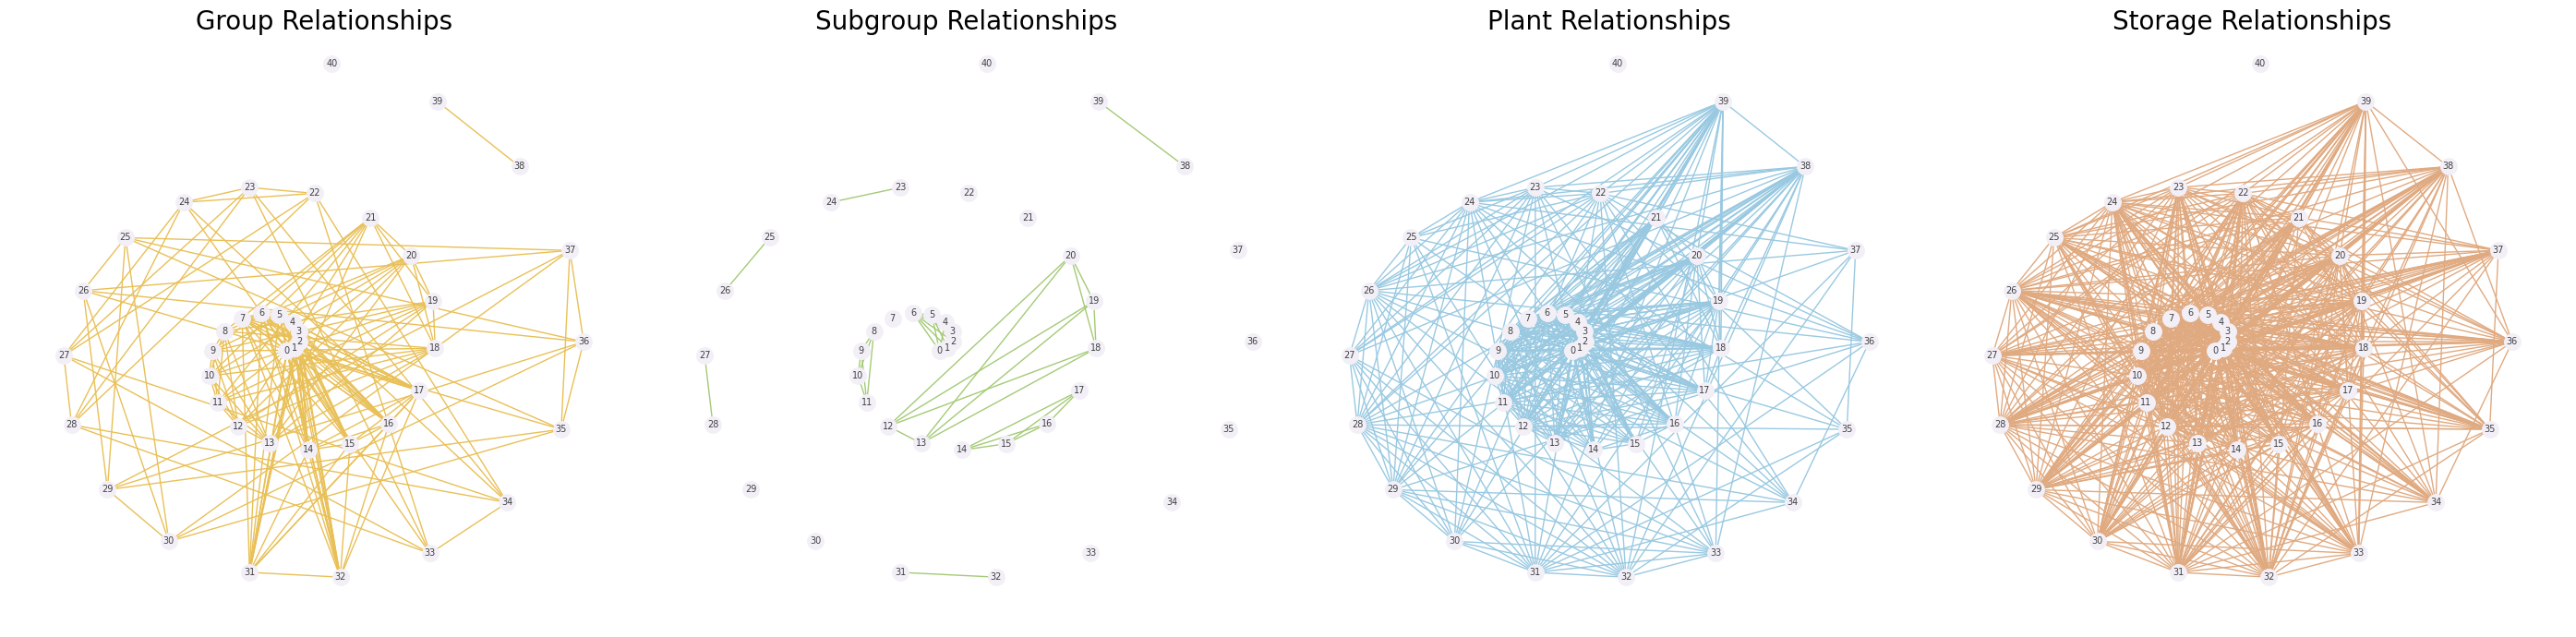

In [ ]:
# Get nodes in graph and set node color
nodes = range(df_unit_sales.shape[1]-1)
node_color = '#F3EFF7'

# Extracting edges from dataframes）
edges_group = list(zip(df_edge_index_group['node1'], df_edge_index_group['node2']))
edges_subgroup = list(zip(df_edge_index_subgroup['node1'], df_edge_index_subgroup['node2']))
edges_plant = list(zip(df_edge_index_plant['node1'], df_edge_index_plant['node2']))
edges_store = list(zip(df_edge_index_stock['node1'], df_edge_index_stock['node2']))

def plot_graph_v2(G, title, edge_color, node_color, pos, ax):
    ax.set_facecolor('#D9D9D9')  # Set the background colour to grey
    nx.draw(G, pos, with_labels=False, node_size=160, node_color=node_color, font_size=7, edge_color=edge_color, ax=ax)
    nx.draw_networkx_labels(G, pos, font_size=7, font_color="#3F4042", font_family="sans-serif", ax=ax)
    ax.set_title(title, fontsize=20)
    ax.axis('off')


# Create 4 subgraphs, each representing a different relationship
G_group = nx.Graph()
G_group.add_nodes_from(nodes)
G_group.add_edges_from(edges_group)

G_subgroup = nx.Graph()
G_subgroup.add_nodes_from(nodes)
G_subgroup.add_edges_from(edges_subgroup)

G_plant = nx.Graph()
G_plant.add_nodes_from(nodes)
G_plant.add_edges_from(edges_plant)

G_storage = nx.Graph()
G_storage.add_nodes_from(nodes)
G_storage.add_edges_from(edges_store)

# Use the same layout for easy comparison
pos = nx.spiral_layout(G_group)
# pos = nx.kamada_kawai_layout(G_group)
# pos = nx.circular_layout(G_group)
# pos = nx.shell_layout(G_group)
# pos = nx.spring_layout(G_group)
# pos = nx.spectral_layout(G_group)
# pos = nx.spring_layout(G_group)


# Create 4 subgraphs and arrange them on the same line
fig, axs = plt.subplots(1, 4, figsize=(28, 7))

plot_graph_v2(G_group, 'Group Relationships',"#E9C057" , node_color, pos, axs[0])
plot_graph_v2(G_subgroup, 'Subgroup Relationships',"#A4CA76", node_color, pos, axs[1])
plot_graph_v2(G_plant, 'Plant Relationships','#99C9E1', node_color, pos, axs[2])
plot_graph_v2(G_storage, 'Storage Relationships','#E0AA81', node_color, pos, axs[3])

plt.tight_layout()
plt.show()

## Viz model performances

In [ ]:
# Login to W&B
wandb.login(key=WANDB_TOKEN)
project_name = 'SupplyGraph_v2'  # Name of WB project
entity_name = "anoif"  # Username

# Get all runs of the project
api = wandb.Api()
runs = api.runs(f"{entity_name}/{project_name}")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [ ]:
def plot_radar_chart(model_names, metric_values, metrics):
    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    # print(angles)
    angles += angles[:1]
    # print(angles)
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    for i, (name, values) in enumerate(zip(model_names, metric_values)):
        # print(name)
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=name)
        ax.fill(angles, values, alpha=0.25)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels([m.split(' ')[1] for m in metrics], fontsize=10, ha='center')

    # Setting the radial axis labels using the metric values
    max_value = np.max(metric_values)
    min_value = np.min(metric_values)
    yticks = np.linspace(min_value, max_value, 5)
    # ax.set_yticklabels([])

    # Setting the distance of the label
    for label, angle in zip(ax.get_xticklabels(), angles):
        x_offset = -np.cos(angle) * 0.5
        y_offset = 0 #np.sin(angle) * 0.2
        label.set_position((label.get_position()[0] + x_offset, label.get_position()[1] + y_offset))

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Model Performance Comparison', fontsize=15, color='#333333')
    plt.show()

[[836.6691284179688, 2039493.375, 1428.1082763671875, 26967223500800], [753.4971313476562, 1725136.5, 1313.4444580078125, 21723470233600], [767.7212524414062, 1770707.25, 1330.67919921875, 22851852697600], [917.5487670898438, 2332141.75, 1527.1351318359375, 29708589465600], [880.6841430664062, 4615402.5, 2148.348876953125, 8873714483200]]
[[836.6691284179688, 2039.493375, 1428.1082763671875, 2696.72235008], [753.4971313476562, 1725.1365, 1313.4444580078125, 2172.34702336], [767.7212524414062, 1770.70725, 1330.67919921875, 2285.18526976], [917.5487670898438, 2332.14175, 1527.1351318359375, 2970.85894656], [880.6841430664062, 4615.4025, 2148.348876953125, 887.37144832]]


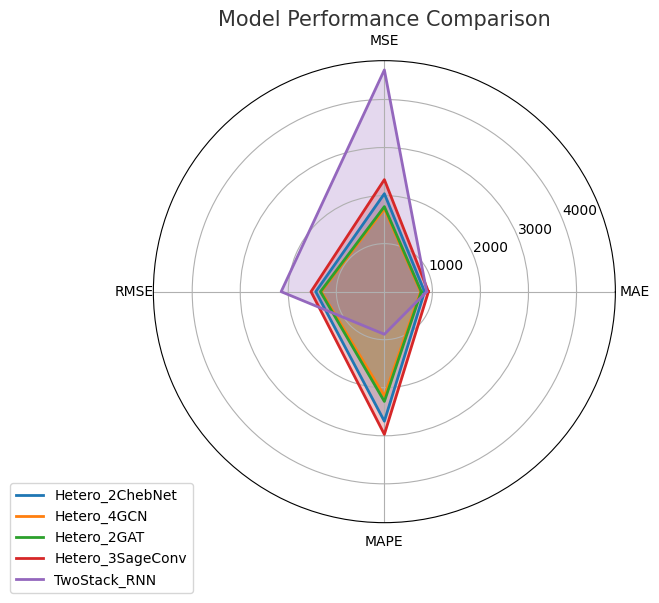

In [ ]:
# Define the metrics to extract from WB
metrics = ["Test MAE", "Test MSE", "Test RMSE", 'Test MAPE']

model_performance = {}
run_names = ['TwoStack_RNN', 'Hetero_4GCN', 'Hetero_2GAT', 'Hetero_3SageConv', 'Hetero_2ChebNet']

for run in runs:
    run_name = run.name
    # print(run_name)
    if run_name in run_names:
        try:
            if model_performance[run_name] is not None:
                if model_performance[run_name][0] > run.summary.get(metrics[0]):
                    new_metrics = []
                    for metric in metrics:
                        metric_value = run.summary.get(metric)
                        # print(metric, metric_value)
                        new_metrics.append(metric_value)
                    model_performance[run_name] = new_metrics

        except:
            new_metrics = []
            for metric in metrics:
                metric_value = run.summary.get(metric)
                # print(metric, metric_value)
                new_metrics.append(metric_value)
            # print(run_name, new_metrics)
            model_performance[run_name] = new_metrics

model_names = list(model_performance.keys())
metric_values = [model_performance[model] for model in model_names if len(model_performance[model]) == len(metrics)]
print(metric_values)

# Normalise all metrics
for i in range(len(metric_values)):
    metric_values[i][1] = metric_values[i][1]/1000
    metric_values[i][2] = metric_values[i][2]/1
    metric_values[i][3] = metric_values[i][3]/10000000000
print(metric_values)

# Ploting
plot_radar_chart(model_names, metric_values, metrics)

## Viz model predictions

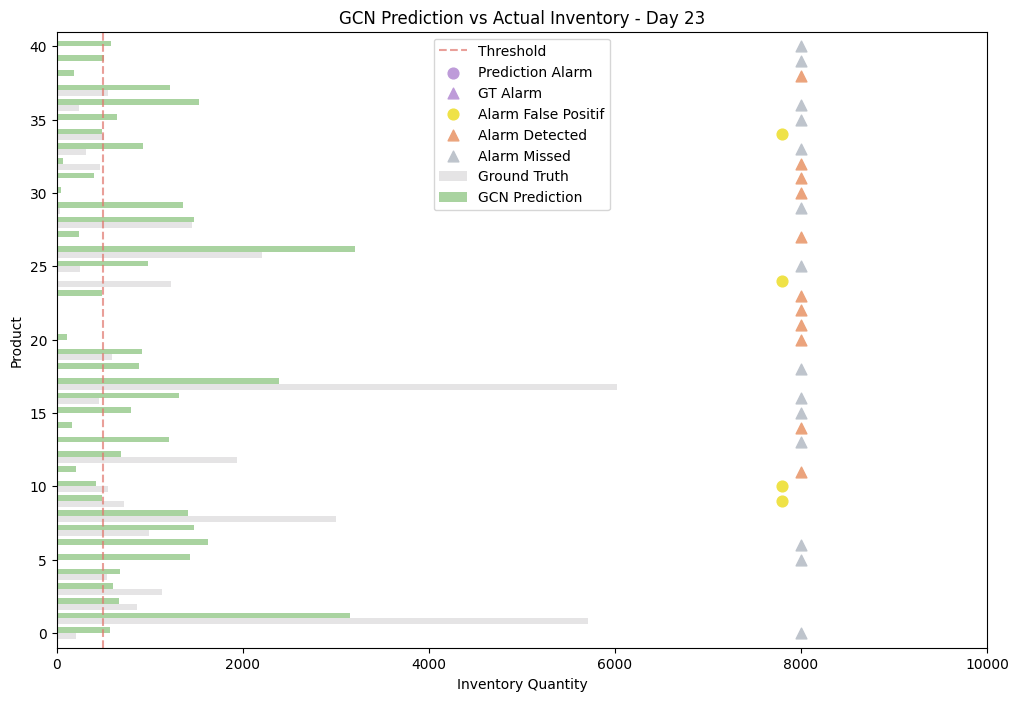

In [ ]:
# Settings
products = 41
days = 23
threshold = 500  # threshold of alarm,if less than 500, alarms

# Get saved predictions and ground truths files
actual = np.load('gcn_gt.npy')
actual = actual.reshape(41,-1)
gcn_pred = np.load('gcn_pred.npy')
gcn_pred = gcn_pred.reshape(41,-1)


fig, ax = plt.subplots(figsize=(12, 8))
# Offset for displaying the two bars separately
offset = 0.2
# Ground Truth
bars_gt = ax.barh(np.arange(products) - offset, actual[:, 0], height=0.4, color='#AAA8AC', alpha=0.3, label='Ground Truth')
# GCN Prediction
bars_pred = ax.barh(np.arange(products) + offset, gcn_pred[:, 0], height=0.4, color='#94C988', alpha=0.8, label='GCN Prediction')
# Adding Threshold Lines
ax.axvline(threshold, color='#E0776E', linestyle='--', label='Threshold', alpha=0.7)

# Add predicted and real alarm points
alarms_pred = ax.scatter([], [], color='#BE9BD9', s=60, zorder=5, label='Prediction Alarm')
alarms_gt = ax.scatter([], [], color='#BE9BD9', s=60, marker='^', zorder=5, label='GT Alarm')


# Add false predicted， real and missed alarm points
alarms_pred_fp = ax.scatter([], [], color='#EFE247', s=60, zorder=5, label='Alarm False Positif')
alarms_gt_detected = ax.scatter([], [], color='#EBA37C', s=60, marker='^', zorder=5, label='Alarm Detected')
alarms_gt_missed = ax.scatter([], [], color='#BEC4CC', s=60, marker='^', zorder=5, label='Alarm Missed')

ax.set_xlim(0, 10000)
ax.set_ylim(-1, products)
ax.set_xlabel('Inventory Quantity')
ax.set_ylabel('Product')
ax.set_title('GCN Prediction vs Actual Inventory')
ax.legend(loc='upper center')

# Animation init func
def init():
    for bar in bars_gt:
        bar.set_width(0)
    for bar in bars_pred:
        bar.set_width(0)
    alarms_pred_fp.set_offsets(np.empty((0, 2)))  # empty two-dimensional array
    alarms_gt_detected.set_offsets(np.empty((0, 2)))    # empty two-dimensional array
    alarms_gt_missed.set_offsets(np.empty((0, 2)))    # empty two-dimensional array
    return bars_gt, bars_pred, alarms_pred_fp, alarms_gt_detected, alarms_gt_missed

# Animation update func
def update(day):
    # update bars
    for i, bar in enumerate(bars_gt):
        bar.set_width(actual[i, day])
    for i, bar in enumerate(bars_pred):
        bar.set_width(gcn_pred[i, day])

    #  Updating false predictive alarm, real alarm and missed alarms
    alarm_positions_pred_fp = []
    # alarm_positions_pred_tp = []
    alarm_positions_gt_detected = []
    alarm_positions_gt_missed = []
    show_loc = 8000
    for i in range(products):
        if (gcn_pred[i, day] < threshold) and (actual[i, day] < threshold):
            alarm_positions_gt_detected.append([show_loc, i ])

        elif (gcn_pred[i, day] < threshold) and (actual[i, day] > threshold):
            alarm_positions_pred_fp.append([show_loc - 1000*offset, i])

        elif (gcn_pred[i, day] > threshold) and (actual[i, day] < threshold):
            alarm_positions_gt_missed.append([show_loc, i ])

    # Update
    alarms_pred_fp.set_offsets(np.array(alarm_positions_pred_fp))
    alarms_gt_detected.set_offsets(np.array(alarm_positions_gt_detected))
    alarms_gt_missed.set_offsets(np.array(alarm_positions_gt_missed))

    try:
        alarms_pred_fp.set_offsets(np.array(alarm_positions_pred_fp))  # Ensure that a two-dimensional array is passed
    except:
        alarms_pred_fp.set_offsets(np.empty((0, 2)))

    try:
        alarms_gt_detected.set_offsets(np.array(alarm_positions_gt_detected))  # Ensure that a two-dimensional array is passed
    except:
        alarms_gt_detected.set_offsets(np.empty((0, 2)))

    try:
        alarms_gt_missed.set_offsets(np.array(alarm_positions_gt_missed))  # Ensure that a two-dimensional array is passed
    except:
        alarms_gt_missed.set_offsets(np.empty((0, 2)))

    ax.set_title(f'GCN Prediction vs Actual Inventory - Day {day + 1}')
    return bars_gt, bars_pred, alarms_pred_fp, alarms_gt_detected, alarms_gt_missed

# Create animation
anim = FuncAnimation(fig, update, frames=days, init_func=init, blit=False, repeat=False)
anim.save('gcn_prediction_vs_actual.mp4', fps=1)

plt.show()

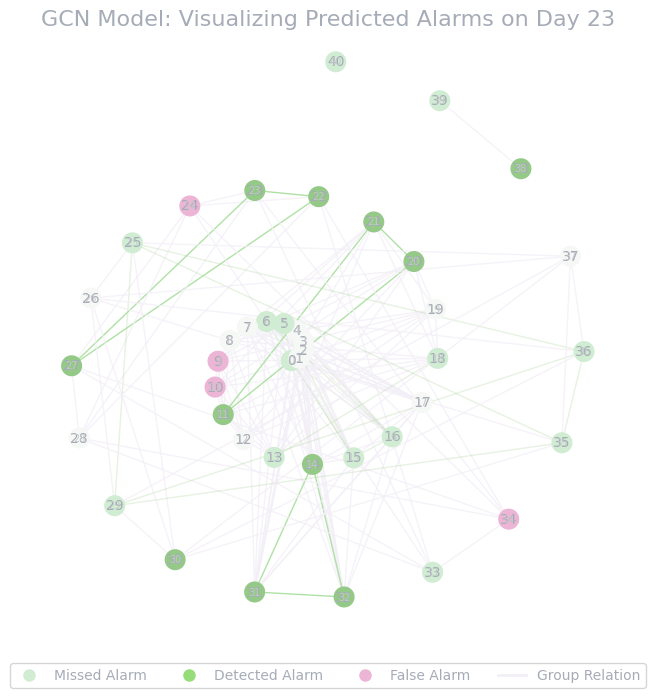

In [ ]:
# Extracting edges from dataframes
edges_group = list(zip(df_edge_index_group['node1'], df_edge_index_group['node2']))
edges_subgroup = list(zip(df_edge_index_subgroup['node1'], df_edge_index_subgroup['node2']))
edges_plant = list(zip(df_edge_index_plant['node1'], df_edge_index_plant['node2']))
edges_store = list(zip(df_edge_index_stock['node1'], df_edge_index_stock['node2']))


# 41 nodes, 23 days, indicating false_alarm, alarm_detected, alarm_missed respectively
# Get saved predictions and ground truths files
actual = np.load('gcn_gt.npy')
actual = actual.reshape(41,-1)
gcn_pred = np.load('gcn_pred.npy')
gcn_pred = gcn_pred.reshape(41,-1)

th=500
false_alarm = np.zeros((41, 23))
alarm_detected = np.zeros((41, 23))
alarm_missed = np.zeros((41, 23))

for day in range(23):
    for i in range(41):
        if (gcn_pred[i, day] < th) and (actual[i, day] < th):
            alarm_detected[i][day] = 1
            alarm_missed[i][day] = 0
            false_alarm[i][day] = 0

        elif (gcn_pred[i, day] < th) and (actual[i, day] > th):
            alarm_detected[i][day] = 0
            alarm_missed[i][day] = 0
            false_alarm[i][day] = 1

        elif (gcn_pred[i, day] > th) and (actual[i, day] < th):
            alarm_detected[i][day] = 0
            alarm_missed[i][day] = 1
            false_alarm[i][day] = 0


G = nx.Graph()
nodes = range(41)
G.add_nodes_from(nodes)

# Only show the group relationship
G.add_edges_from(edges_group)
# Create the layout
pos = nx.spiral_layout(G)


fig, ax = plt.subplots(figsize=(8, 8))

def update(day):
    ax.clear()  # Clear the contents of the previous frame

    # set nodes colors (3 types)
    colors = []
    for i in range(41):
        if alarm_detected[i, day]:
            colors.append('#94C988')
        elif false_alarm[i, day]:
            colors.append('#ECB4D5')
        elif alarm_missed[i, day]:
            colors.append('#D0ECD2')
        else:
            colors.append('#F6F8F6')  # Nodes that have not triggered an alarm are shown in grey

    # Setting the colour and style of the edges
    edges = G.edges()
    edge_colors = []
    edge_styles = []

    for edge in edges:
        node1, node2 = edge
        if alarm_detected[node1, day] and alarm_detected[node2, day]:
            edge_colors.append('#AFE1A5')
            edge_styles.append('solid')
        elif alarm_missed[node1, day] and alarm_missed[node2, day]:
            edge_colors.append((0.706, 0.843, 0.647, 0.32))
            edge_styles.append('solid')
        else:
            edge_colors.append((0.953, 0.937, 0.969, 0.8))
            edge_styles.append('solid')

    # Drawing
    nx.draw(G, pos, ax=ax, with_labels=True, node_size=200, node_color=colors, font_size=10, font_color="#A6ACB7", edge_color=edge_colors, style=edge_styles)
    nx.draw_networkx_labels(G, pos, font_size=7, font_color="#C4C6CA", font_family="sans-serif")
    # nx.draw_networkx_edges(G, pos, ax=ax, alpha=0.5, width=0.2, edge_color=edge_colors, style=edge_styles)

    ax.set_title(f'GCN Model: Visualizing Predicted Alarms on Day {day + 1}', color='#A6ACB7', fontsize=16)
    ax.axis('off')

    # Add legend, horizontally centred at the bottom
    legend_labels = ['Missed Alarm', 'Detected Alarm', 'False Alarm', 'Group Relation']
    legend_handles = [
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#D0ECD2', markersize=10, label='Missed Alarm'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#96DC78', markersize=10, label='Detected Alarm'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ECB4D5', markersize=10, label='False Alarm'),
        plt.Line2D([0], [0], color=(0.953, 0.937, 0.969, 1), lw=2, label='Group Relation')
        # plt.Line2D([0], [0], marker='-', color='w', markerfacecolor='#AFE1A5', markersize=10, label='Group Relation')
    ]
    legend = ax.legend(handles=legend_handles, loc='upper center', bbox_to_anchor=(0.5, -.01), ncol=4, frameon=True)

    for text in legend.get_texts():
        text.set_color("#A6ACB7")

# Creating animation
anim = FuncAnimation(fig, update, frames=days, repeat=False)
anim.save('alarm_status_with_group_relations_animation.mp4', fps=1)

plt.show()